In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
gen_losses = np.load("datas/losses/dcgan/gen_losses.npy")
disc_losses = np.load("datas/losses/dcgan/disc_losses.npy")

msg_gen_losses = np.load("datas/losses/msggan/msg_generator_losses.npy")
msg_disc_losses = np.load("datas/losses/msggan/msg_discriminator_losses.npy")

batch_size = 16

epochs = 2

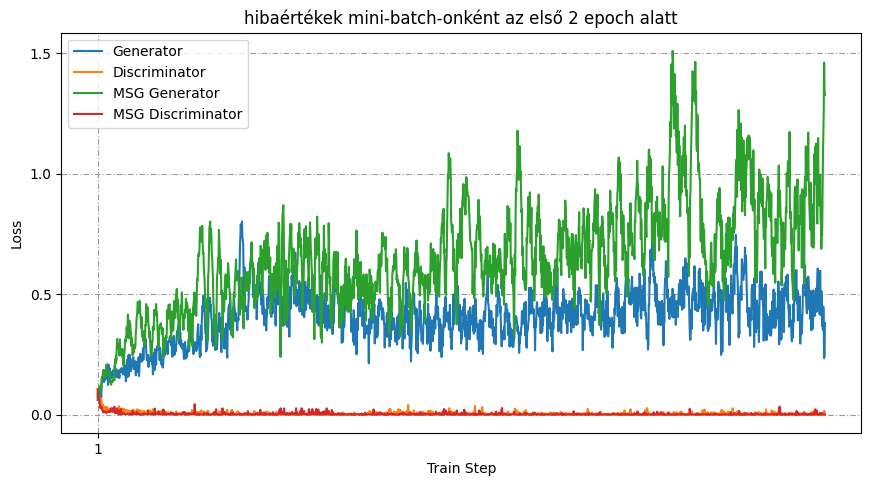

In [3]:
trainsteps = gen_losses.shape[1] * epochs

gen = gen_losses[:epochs].flatten() / batch_size
disc = disc_losses[:epochs].flatten() / batch_size

msg_gen = msg_gen_losses[:epochs].flatten() / batch_size
msg_disc = msg_disc_losses[:epochs].flatten() / batch_size

fig_1 = plt.figure(figsize=(8, 4), dpi=100)
ax = fig_1.add_axes([0, 0, 1, 1])
ax.set_xlabel('Train Step')
ax.set_ylabel('Loss')
ax.set_title('hibaértékek mini-batch-onként az első 2 epoch alatt')
ax.plot(np.linspace(1, trainsteps, trainsteps), gen, label='Generator')
ax.plot(np.linspace(1, trainsteps, trainsteps), disc, label='Discriminator')

ax.plot(np.linspace(1, trainsteps, trainsteps), msg_gen, label='MSG Generator')
ax.plot(np.linspace(1, trainsteps, trainsteps), msg_disc, label='MSG Discriminator')

ax.legend(loc=0)

ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

x_ticks = np.arange(0, trainsteps+1, 10000)
x_ticks[0] = 1
ax.set_xticks(x_ticks)

plt.show()

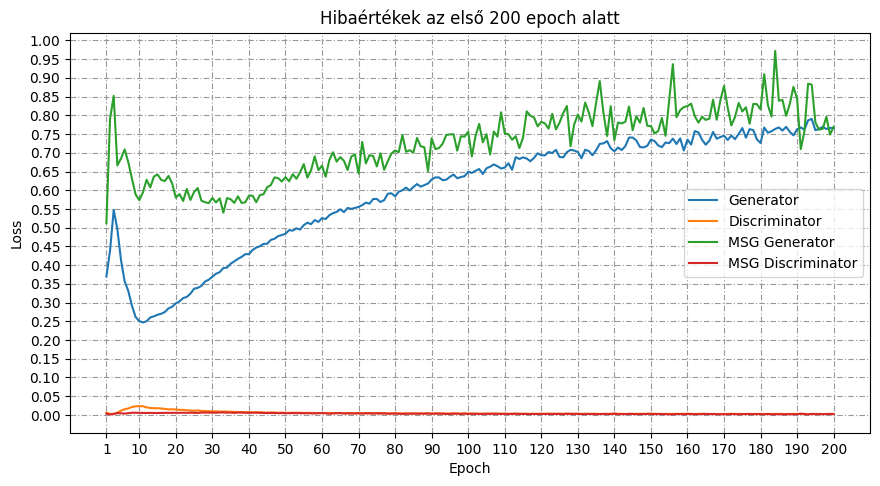

In [4]:
epochs = 200

gen = gen_losses[:epochs].mean(axis=1) / batch_size
disc = disc_losses[:epochs].mean(axis=1) / batch_size

msg_gen = msg_gen_losses[:epochs].mean(axis=1) / batch_size
msg_disc = msg_disc_losses[:epochs].mean(axis=1) / batch_size

fig_1 = plt.figure(figsize=(8, 4), dpi=100)
ax = fig_1.add_axes([0, 0, 1, 1])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Hibaértékek az első 200 epoch alatt')
ax.plot(np.linspace(1, epochs, epochs), gen, label='Generator')
ax.plot(np.linspace(1, epochs, epochs), disc, label='Discriminator')

ax.plot(np.linspace(1, epochs, epochs), msg_gen, label='MSG Generator')
ax.plot(np.linspace(1, epochs, epochs), msg_disc, label='MSG Discriminator')

ax.legend(loc=0)

ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

x_ticks = np.arange(0, epochs+1, 10)
x_ticks[0] = 1
ax.set_xticks(x_ticks)
plt.show()